In [ ]:
import pandas as pd
import seaborn as sns

# Load the dataset
data = pd.read_csv('github_dataset.csv')

# Display the first few rows of the dataset and its summary information
data_info = data.info()
data_head = data.head()

data_info, data_head
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repositories   1052 non-null   object
 1   stars_count    1052 non-null   int64 
 2   forks_count    1052 non-null   int64 
 3   issues_count   1052 non-null   int64 
 4   pull_requests  1052 non-null   int64 
 5   contributors   1052 non-null   int64 
 6   language       907 non-null    object
dtypes: int64(5), object(2)
memory usage: 57.7+ KB


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


这段代码输出展示了加载进来的GitHub数据集的基本信息和前五行数据。数据集包含1052条记录，分布在7个不同的列中，具体包括：

repositories：仓库名称，1052个非空值，为字符串类型。
stars_count：星标数量，1052个非空值，为整数类型。
forks_count：分支数量，1052个非空值，为整数类型。
issues_count：问题数量，1052个非空值，为整数类型。
pull_requests：拉取请求数量，1052个非空值，为整数类型。
contributors：贡献者数量，1052个非空值，为整数类型。
language：编程语言，其中有907个非空值，为字符串类型，表明有一部分记录的编程语言信息缺失。
通过查看数据集的前五行，我们可以看到不同仓库的星标数、分支数、问题数、拉取请求数、贡献者数以及编程语言的示例。这些信息为我们进行后续的数据分析和探索提供了基础。

Вывод этого кода показывает основную информацию и первые пять строк данных загруженного набора данных GitHub. Набор данных содержит 1052 записи, распределенные по 7 различным столбцам, в том числе:

репозитории: имя склада, 1052 ненулевых значения, строковый тип. stars_count: количество звезд, 1052 ненулевых значения, целочисленный тип. forks_count: количество ветвей, 1052 ненулевых значения, целочисленный тип. Issues_count: количество проблем, 1052 ненулевых значения, целочисленный тип. pull_requests: количество запросов на включение, 1052 ненулевых значения, целочисленный тип. Участники: количество участников, 1052 ненулевых значения, целочисленный тип. язык: язык программирования, в котором имеется 907 ненулевых значений, которые являются строковыми типами, что указывает на отсутствие некоторой записанной информации о языке программирования. Глядя на первые пять строк набора данных, мы можем увидеть примеры звездочек, ветвей, задач, запросов на включение, участников и языков программирования для разных репозиториев. Эта информация обеспечивает основу для нашего последующего анализа и исследования данных.

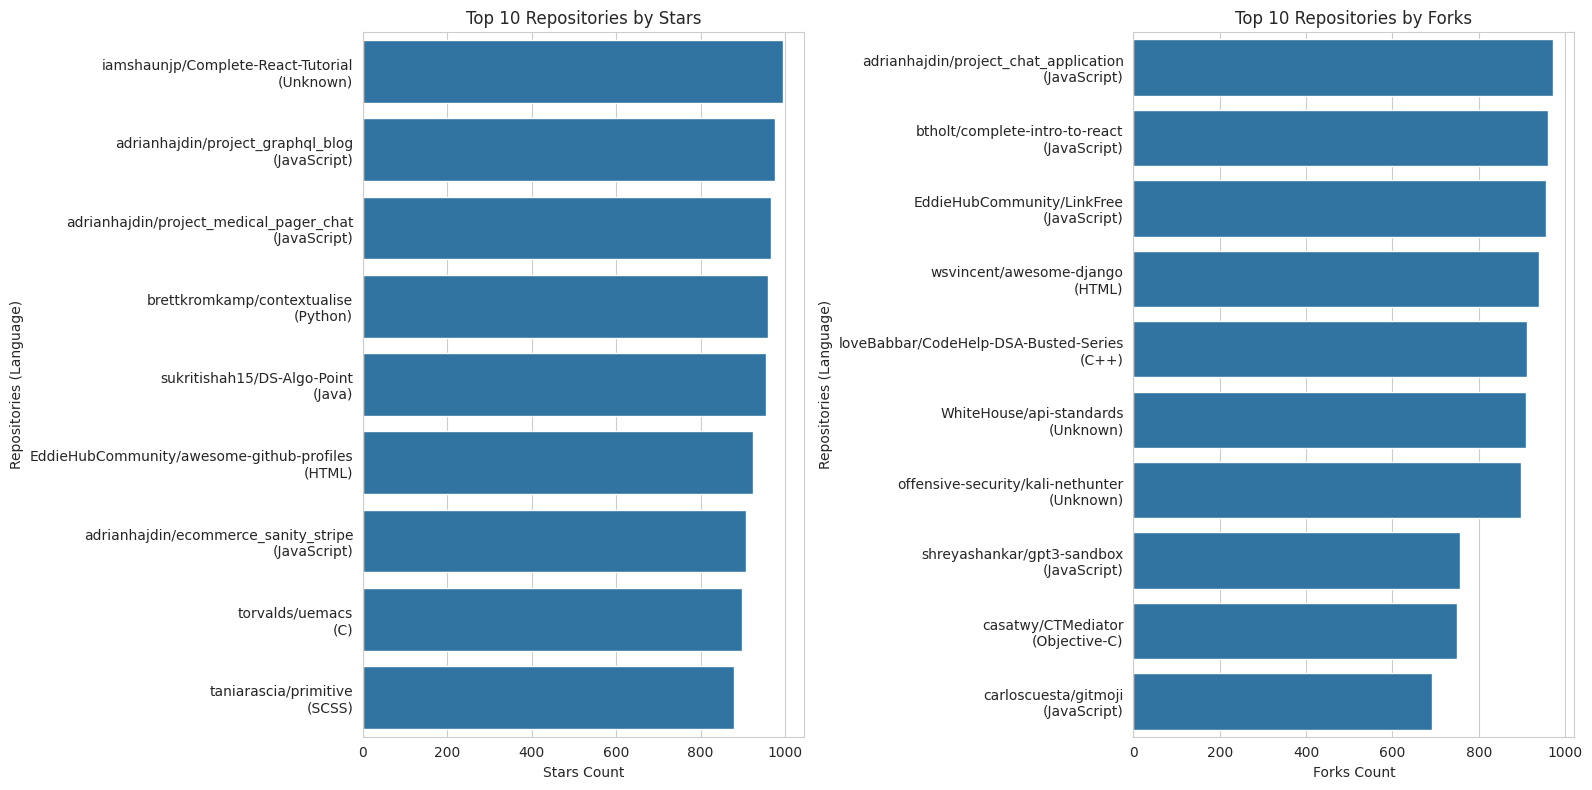

In [ ]:
# 准备数据：选取星标数和分支数前10的仓库，并且合并仓库名称和使用的语言
top_stars = data.nlargest(10, 'stars_count')
top_forks = data.nlargest(10, 'forks_count')
top_stars['repo_language'] = top_stars['repositories'] + '\n(' + top_stars['language'].fillna('Unknown') + ')'
top_forks['repo_language'] = top_forks['repositories'] + '\n(' + top_forks['language'].fillna('Unknown') + ')'

plt.figure(figsize=(16, 8))

# 星标数前10的仓库
plt.subplot(1, 2, 1)
sns.barplot(x='stars_count', y='repo_language', data=top_stars)
plt.title('Top 10 Repositories by Stars')
plt.xlabel('Stars Count')
plt.ylabel('Repositories (Language)')

# 分支数前10的仓库
plt.subplot(1, 2, 2)
sns.barplot(x='forks_count', y='repo_language', data=top_forks)
plt.title('Top 10 Repositories by Forks')
plt.xlabel('Forks Count')
plt.ylabel('Repositories (Language)')

plt.tight_layout()
plt.show()


通过上图，我们分别展示了GitHub数据集中星标数和分支数最多的前10个仓库：

左侧图表（Top 10 Repositories by Stars）：展示了根据星标数量排名前10的仓库。星标数量作为衡量仓库受欢迎程度的一个重要指标，这些仓库显然在开源社区中非常受欢迎和认可。

右侧图表（Top 10 Repositories by Forks）：展示了根据分支数量排名前10的仓库。分支数量不仅反映了仓库的受欢迎程度，也反映了社区成员对项目的参与和贡献意愿。

这两个图表为我们提供了一个初步的视角，了解哪些仓库在GitHub上最为突出。接下来，我们将继续分析仓库的问题和拉取请求，以深入了解社区参与度和项目活跃度。 ​

На рисунке выше мы показываем 10 лучших репозиториев с наибольшим количеством звездочек и ветвей в наборе данных GitHub:

Диаграмма слева (10 лучших репозиториев по количеству звезд): показывает 10 лучших репозиториев по количеству звезд. Количество звезд служит важным индикатором популярности репозитория, и эти репозитории явно очень популярны и признаны в сообществе открытого исходного кода.

Диаграмма справа (10 лучших репозиториев по версии Forks): показывает 10 лучших репозиториев по количеству филиалов. Количество веток отражает не только популярность репозитория, но и готовность членов сообщества участвовать и вносить свой вклад в проект.

Эти две диаграммы дают нам предварительное представление о том, какие репозитории наиболее заметны на GitHub. Далее мы продолжим анализировать проблемы репозитория и запросы на включение, чтобы получить представление о взаимодействии сообщества и активности проекта. ​

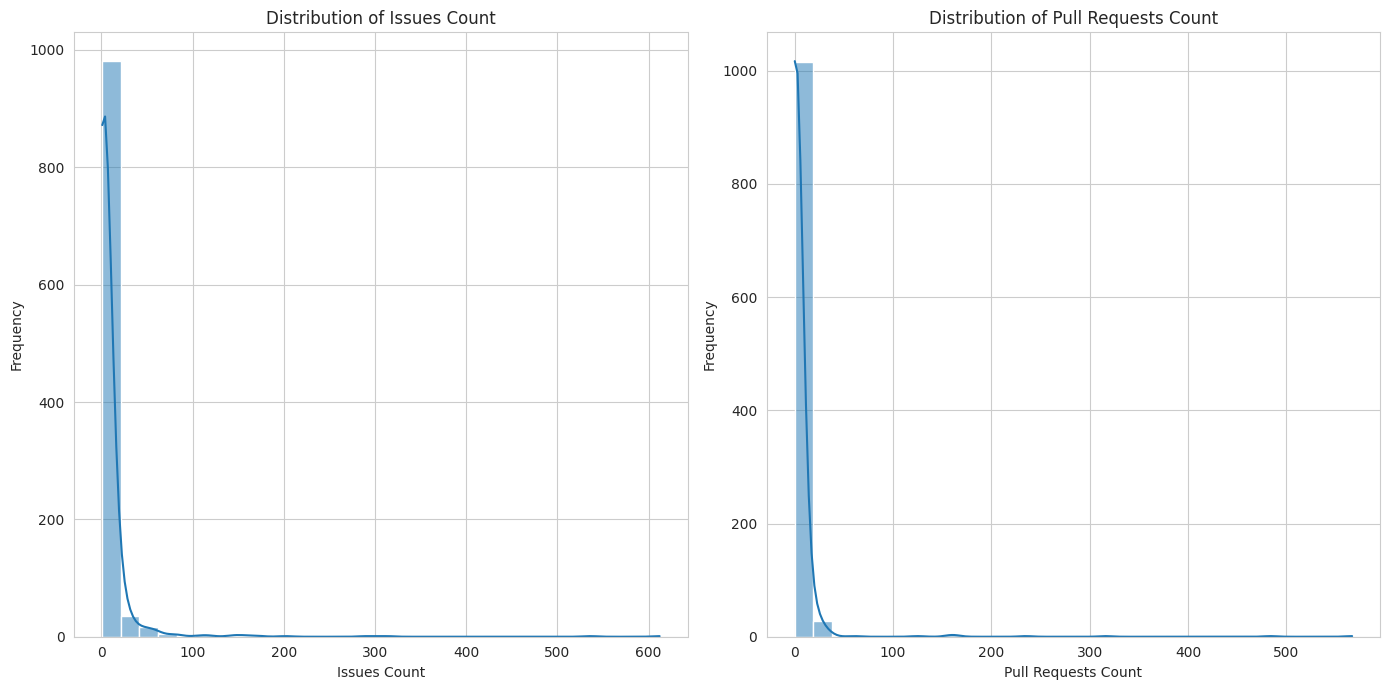

In [ ]:
# 2. 问题和拉取请求分析
# 分析问题数量和拉取请求数量的分布情况

plt.figure(figsize=(14, 7))

# 问题数量分布
plt.subplot(1, 2, 1)
sns.histplot(data['issues_count'], bins=30, kde=True)
plt.title('Distribution of Issues Count')
plt.xlabel('Issues Count')
plt.ylabel('Frequency')

# 拉取请求数量分布
plt.subplot(1, 2, 2)
sns.histplot(data['pull_requests'], bins=30, kde=True)
plt.title('Distribution of Pull Requests Count')
plt.xlabel('Pull Requests Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


在这两张图中，我们分析了GitHub仓库的问题数量和拉取请求数量的分布情况：

左侧图表（Distribution of Issues Count）：展示了问题数量的分布。大多数仓库的问题数量集中在较低的范围内，但也有少数仓库拥有非常高的问题数量，这可能反映了这些仓库的高活跃度或存在的问题。

右侧图表（Distribution of Pull Requests Count）：展示了拉取请求数量的分布。与问题数量的分布类似，大多数仓库的拉取请求数量也较低，但存在一些拥有较高拉取请求的仓库，表明了社区成员积极参与和改进项目的意愿。

这些分布图为我们提供了关于GitHub仓库活跃度的直观理解，表明了问题数量和拉取请求数量是衡量社区参与和项目活跃度的重要指标。接下来，我们将探索贡献者分布情况。

На этих двух рисунках мы анализируем распределение количества проблем и количества пул-реквестов в репозитории GitHub:

Диаграмма слева (Распределение количества проблем): показывает распределение количества проблем. На большинстве складов количество выпусков находится в нижнем диапазоне, но на некоторых из них количество выпусков очень высокое, что может отражать высокую активность или проблемы на этих складах.

Диаграмма справа (Распределение количества запросов на включение): показывает распределение количества запросов на включение. Подобно распределению номеров проблем, большинство репозиториев также имеют небольшое количество запросов на включение, но есть некоторые репозитории с более высоким количеством запросов на включение, что демонстрирует готовность членов сообщества активно участвовать в проекте и улучшать его.

Эти диаграммы распределения дают нам интуитивное понимание активности репозитория GitHub, показывая, что количество проблем и запросов на включение являются важными показателями участия сообщества и активности проекта. Далее мы рассмотрим распределение участников.

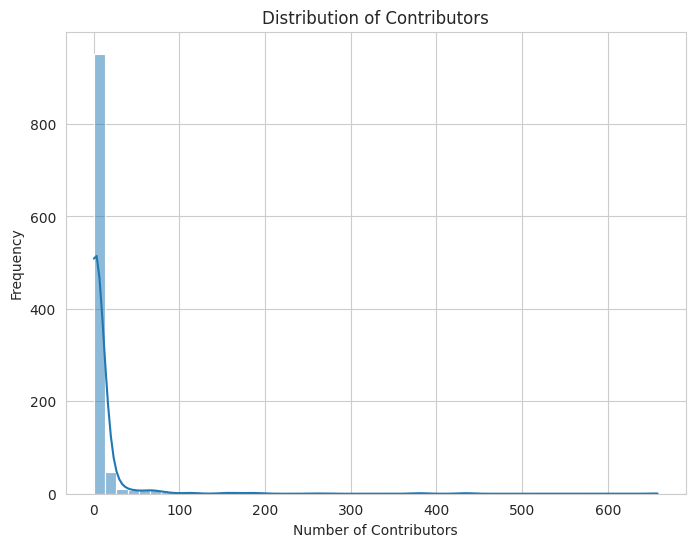

In [ ]:
# 3. 贡献者分布
# 分析贡献者数量的分布情况

plt.figure(figsize=(8, 6))
sns.histplot(data['contributors'], bins=50, kde=True)
plt.title('Distribution of Contributors')
plt.xlabel('Number of Contributors')
plt.ylabel('Frequency')
plt.show()


分析图表 - 贡献者分布情况：

这张图展示了GitHub仓库贡献者数量的分布。我们可以观察到，大多数仓库的贡献者数量集中在较低的区间内，这意味着许多仓库可能是由较小的团队或个人维护的。然而，也存在少数仓库拥有大量贡献者，这些仓库很可能是大型项目或广受社区支持的项目。

此分布图揭示了GitHub上项目参与度的多样性，从小型项目到大型社区驱动的项目都有。

Диаграмма анализа – Распределение участников:

На этом графике показано распределение количества участников в репозиториях GitHub. Мы можем наблюдать, что количество участников большинства репозиториев сконцентрировано в нижнем диапазоне, а это означает, что многие репозитории могут поддерживаться меньшими командами или отдельными людьми. Однако есть несколько репозиториев с большим количеством участников, и это, скорее всего, будут крупные проекты или проекты с широкой поддержкой сообщества.

Эта карта распределения показывает разнообразие участия в проектах на GitHub: от небольших проектов до крупных проектов, управляемых сообществом.

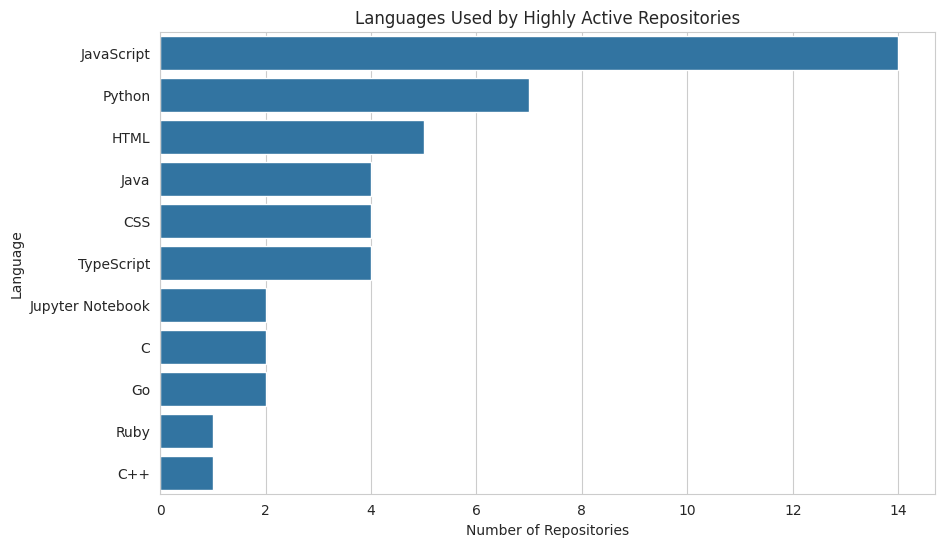

In [ ]:
# 定义"非常活跃"的仓库标准，这里我们选择星标数量、问题数量和拉取请求数量均高于其相应75%分位数的仓库

# 计算75%分位数
stars_75th = data['stars_count'].quantile(0.75)
issues_75th = data['issues_count'].quantile(0.75)
pulls_75th = data['pull_requests'].quantile(0.75)

# 筛选出符合条件的仓库
active_repos = data[(data['stars_count'] > stars_75th) & (data['issues_count'] > issues_75th) & (data['pull_requests'] > pulls_75th)]

# 分析这些仓库使用的编程语言
active_languages = active_repos['language'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=active_languages.values, y=active_languages.index)
plt.title('Languages Used by Highly Active Repositories')
plt.xlabel('Number of Repositories')
plt.ylabel('Language')
plt.show()


分析图表 - 高活跃度仓库使用的编程语言：

此图展示了在我们定义的“非常活跃”的GitHub仓库中，使用的编程语言分布情况。这些仓库被定义为星标数量、问题数量和拉取请求数量均高于其相应75%分位数的仓库。

从图表中我们可以看出，只有少数编程语言在这些高活跃度仓库中被广泛使用。这可能表明，某些编程语言更适合于活跃和广受欢迎的项目，或者这些语言的社区本身就更加活跃和参与度更高。

通过这项分析，我们能够更好地了解哪些编程语言在开源社区中特别活跃的项目中占据主导地位，进一步揭示了技术趋势和开发者兴趣的重要方面。这也可能为选择技术栈或加入开源项目提供有用的参考。

Аналитические диаграммы — язык программирования, используемый высокоактивными репозиториями:

На этом графике показано распределение языков программирования, используемых в так называемых «очень активных» репозиториях GitHub. Эти репозитории определяются как репозитории, у которых количество звезд, количество проблем и количество запросов на включение выше соответствующего 75-го процентиля.

Из диаграммы мы видим, что в этих высокоактивных репозиториях широко используются лишь несколько языков программирования. Это может указывать на то, что определенные языки программирования лучше подходят для активных и популярных проектов или на то, что сами сообщества более активны и вовлечены.

Этот анализ позволяет лучше понять, какие языки программирования доминируют в проектах, проявляющих особую активность в сообществе открытого исходного кода, дополнительно раскрывая важные аспекты технологических тенденций и интересов разработчиков. Это также может стать полезной ссылкой для выбора технологического стека или присоединения к проекту с открытым исходным кодом.

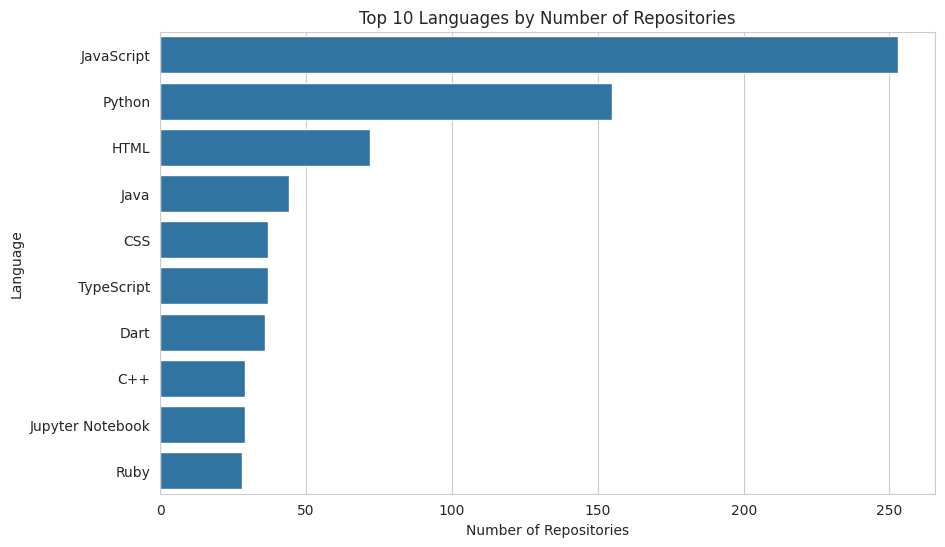

In [ ]:
# 4. 编程语言偏好
# 分析不同编程语言的仓库数量

language_counts = data['language'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.values, y=language_counts.index)
plt.title('Top 10 Languages by Number of Repositories')
plt.xlabel('Number of Repositories')
plt.ylabel('Language')
plt.show()


此图展示了GitHub数据集中拥有最多仓库的前10种编程语言。这为我们提供了一个关于哪些编程语言最受开源社区欢迎和使用的视角。我们可以看到，某些语言因其特定的应用场景或社区支持，拥有较多的仓库数量。

通过这张图，我们能够理解编程语言的流行度和开发者社区的偏好，这对于了解技术趋势和社区动态非常有价值。

На этом графике показаны 10 лучших языков программирования с наибольшим количеством репозиториев в наборе данных GitHub. Это дает нам представление о том, какие языки программирования наиболее популярны и используются сообществом открытого исходного кода. Мы видим, что некоторые языки имеют большее количество репозиториев из-за их специфических сценариев применения или поддержки сообщества.

С помощью этого графика мы можем понять популярность языков программирования и предпочтения сообщества разработчиков, что очень ценно для понимания технологических тенденций и динамики сообщества.

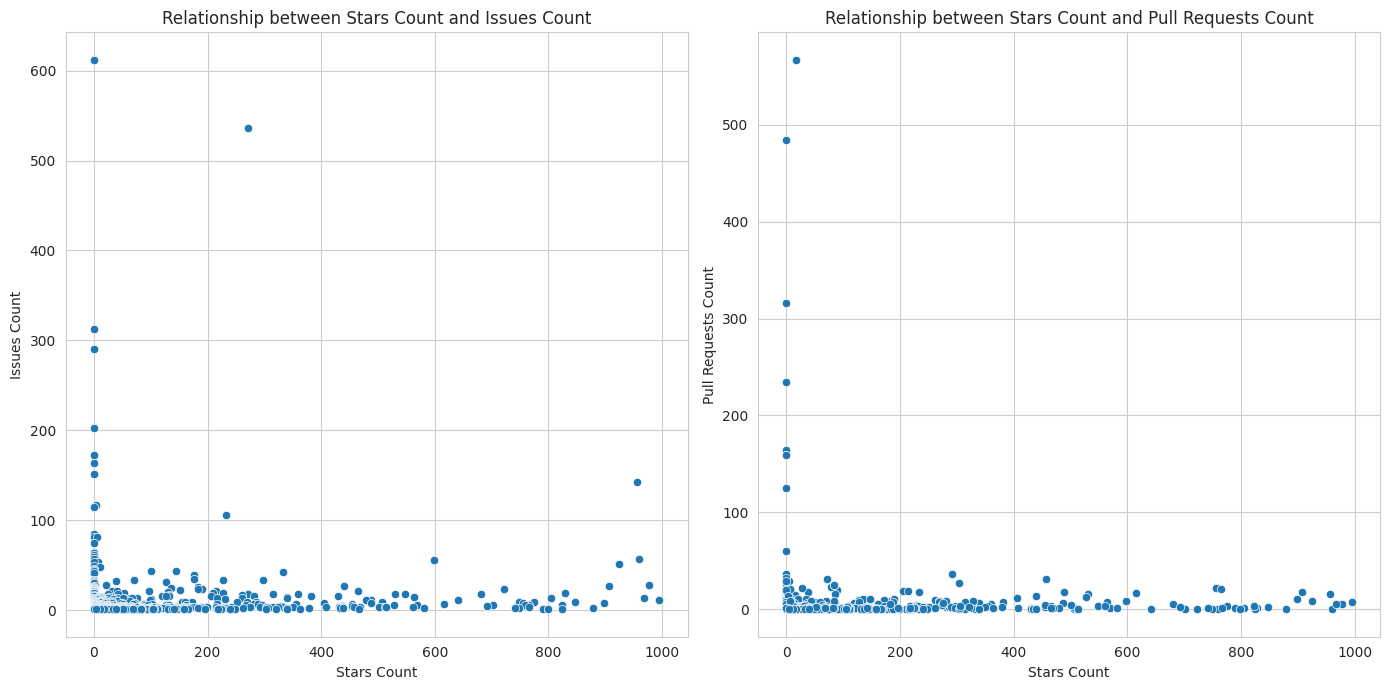

In [ ]:
# 5. 仓库活跃度与受欢迎程度的关系
# 分析星标数量与问题数量、拉取请求数量之间的关系

plt.figure(figsize=(14, 7))

# 星标数量与问题数量的关系
plt.subplot(1, 2, 1)
sns.scatterplot(x='stars_count', y='issues_count', data=data)
plt.title('Relationship between Stars Count and Issues Count')
plt.xlabel('Stars Count')
plt.ylabel('Issues Count')

# 星标数量与拉取请求数量的关系
plt.subplot(1, 2, 2)
sns.scatterplot(x='stars_count', y='pull_requests', data=data)
plt.title('Relationship between Stars Count and Pull Requests Count')
plt.xlabel('Stars Count')
plt.ylabel('Pull Requests Count')

plt.tight_layout()
plt.show()


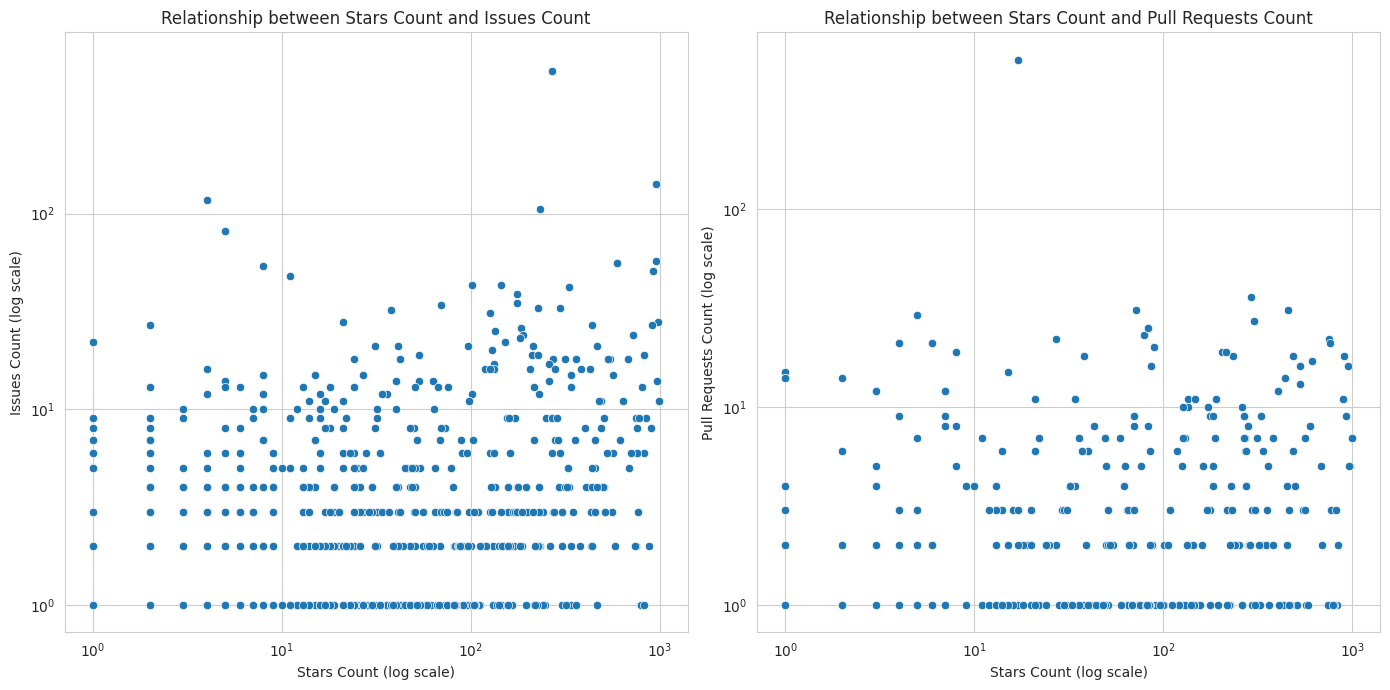

In [ ]:
# 调整图表的缩放，使纵轴的变化更明显
plt.figure(figsize=(14, 7))

# 星标数量与问题数量的关系，使用对数缩放
plt.subplot(1, 2, 1)
sns.scatterplot(x='stars_count', y='issues_count', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between Stars Count and Issues Count')
plt.xlabel('Stars Count (log scale)')
plt.ylabel('Issues Count (log scale)')

# 星标数量与拉取请求数量的关系，使用对数缩放
plt.subplot(1, 2, 2)
sns.scatterplot(x='stars_count', y='pull_requests', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between Stars Count and Pull Requests Count')
plt.xlabel('Stars Count (log scale)')
plt.ylabel('Pull Requests Count (log scale)')

plt.tight_layout()
plt.show()


分析图表 - 仓库活跃度与受欢迎程度的关系：

这两张图探讨了GitHub仓库的星标数量（受欢迎程度的指标）与问题数量及拉取请求数量（活跃度的指标）之间的关系。

这些关系揭示了受欢迎程度和活跃度之间的动态，进一步强调了星标数量、问题和拉取请求作为衡量仓库重要性和社区参与度的重要指标。

我们同时通过使用对数缩放来调整了星标数量与问题数量、拉取请求数量之间关系的图表，使得纵轴的变化更加明显。

但是我们发现数据平均,并没有什么有效的特征.

Диаграмма анализа – взаимосвязь активности склада и популярности:

Эти два графика исследуют взаимосвязь между количеством звезд репозитория GitHub (показатель популярности) и количеством проблем и запросов на включение (показатель активности).

Эти отношения показывают динамику между популярностью и активностью, еще больше подчеркивая количество звезд, проблем и запросов на включение как важных показателей важности репозитория и участия сообщества.

Мы также скорректировали график зависимости количества звезд от количества задач и запросов на включение, используя логарифмическое масштабирование, чтобы изменения по вертикальной оси были более очевидными.

Но мы обнаружили, что усредненные данные не имеют каких-либо эффективных особенностей.

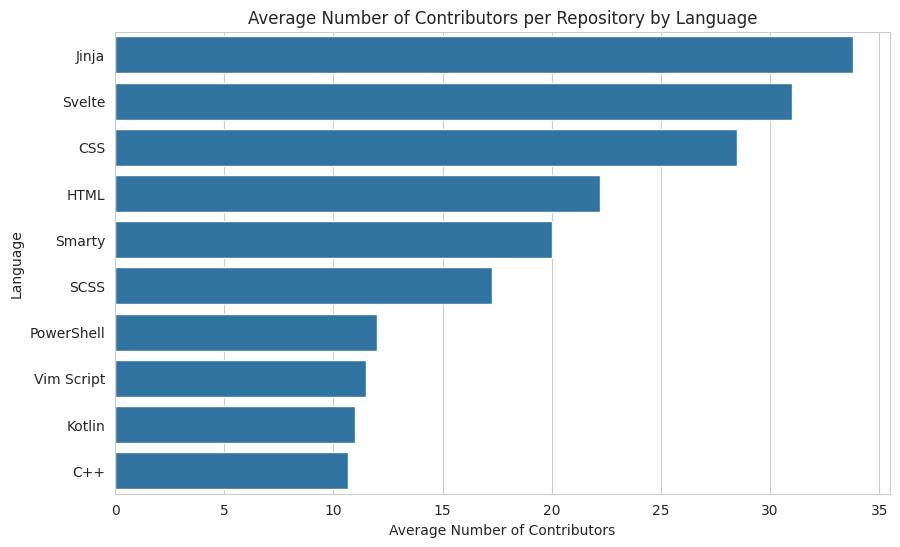

In [ ]:
# 6. 语言与贡献者关系
# 分析不同编程语言的仓库的平均贡献者数量

language_contributors = data.groupby('language')['contributors'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_contributors.values, y=language_contributors.index)
plt.title('Average Number of Contributors per Repository by Language')
plt.xlabel('Average Number of Contributors')
plt.ylabel('Language')
plt.show()


分析图表 - 语言与贡献者关系：

此图展示了GitHub数据集中，按编程语言分类的仓库的平均贡献者数量。选择了平均贡献者数量最多的前10种编程语言。

从图表中我们可以看出，某些编程语言的仓库平均吸引了更多的贡献者。这可能反映了这些语言的社区活跃度、仓库的重要性或项目的规模。高贡献者数量不仅表明了强大的社区支持，也可能是项目多样性和开放性的指标。

这项分析为我们提供了洞察，了解哪些编程语言的项目更容易吸引广泛的社区参与和贡献，这对于评估技术生态和社区活跃度非常有价值。

Диаграмма анализа: язык и взаимоотношения с участниками:

На этом графике показано среднее количество участников репозиториев по языкам программирования в наборе данных GitHub. Были выбраны 10 лучших языков программирования с наибольшим средним количеством участников.

Из диаграммы мы видим, что репозитории для определенных языков программирования в среднем привлекают больше участников. Это может отражать активность сообщества этих языков, важность репозитория или размер проекта. Большое количество участников не только указывает на сильную поддержку сообщества, но также может быть показателем разнообразия и открытости проекта.

Этот анализ дает нам представление о том, какие проекты языков программирования с большей вероятностью привлекут широкое участие и вклад сообщества, что очень ценно для оценки экологии технологий и активности сообщества.

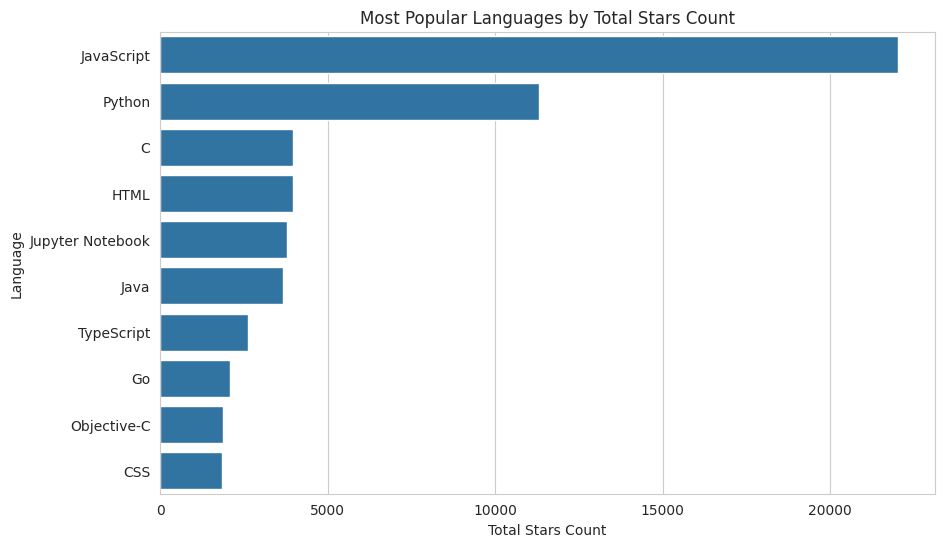

In [ ]:
# 7. 最受欢迎的编程语言
# 基于星标数量找出最受欢迎的编程语言

language_popularity = data.groupby('language')['stars_count'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=language_popularity.values, y=language_popularity.index)
plt.title('Most Popular Languages by Total Stars Count')
plt.xlabel('Total Stars Count')
plt.ylabel('Language')
plt.show()


分析图表 - 最受欢迎的编程语言：

此图展示了GitHub数据集中，基于总星标数量来衡量的最受欢迎的前10种编程语言。星标数量是衡量仓库受欢迎程度和社区认可的一个关键指标，因此这张图为我们提供了哪些编程语言在开源社区中最为受欢迎的直观视角。

通过这项分析，我们可以看出，某些编程语言因其广泛的应用场景、强大的社区支持或特定的技术优势，总体上获得了更多的星标。这些语言往往与当前的技术趋势和开发者兴趣紧密相关。

Анализ диаграмм – самые популярные языки программирования:

На этом графике показаны 10 самых популярных языков программирования в наборе данных GitHub по общему количеству звезд. Количество звезд является ключевым показателем популярности репозитория и признания сообщества, поэтому этот график дает нам визуальное представление о том, какие языки программирования наиболее популярны в сообществе открытого исходного кода.

Из этого анализа мы видим, что некоторые языки программирования в целом получают больше звезд из-за их широкого использования, сильной поддержки сообщества или конкретных технических преимуществ. Эти языки, как правило, тесно связаны с текущими технологическими тенденциями и интересами разработчиков.

总结
通过对GitHub数据集的深入分析，我们构建了一个包含七个关键分析方向的数据故事。这些分析从不同角度揭示了仓库的受欢迎程度、社区活跃度、编程语言的偏好和项目的社区支持等多个维度。通过这些分析，我们可以得出以下几点结论：

仓库受欢迎程度和活跃度：高星标数量和大量的拉取请求通常指示着仓库的高受欢迎程度和社区活跃度。
贡献者分布：大多数仓库由较少的贡献者维护，但也有一些大型项目吸引了大量贡献者。
编程语言偏好：某些编程语言因其特定的优势或应用场景，在GitHub上拥有更多的仓库和更高的受欢迎程度。
社区参与和贡献：一些编程语言的项目更容易吸引广泛的社区参与和贡献。
这些结论不仅提供了对GitHub开源项目活动的深入了解，也反映了当前技术趋势和开发社区的动态。

Резюме. Благодаря углубленному анализу набора данных GitHub мы создали историю данных, содержащую семь ключевых направлений анализа. Этот анализ выявляет множество аспектов, таких как популярность хранилища, активность сообщества, предпочтения языка программирования и поддержка проекта сообществом с разных точек зрения. Проведя этот анализ, мы можем сделать следующие выводы:

Популярность и активность репозитория. Большое количество звезд и большое количество запросов на включение обычно указывают на высокую популярность и активность сообщества репозитория. Распространение участников: большинство репозиториев поддерживается небольшим количеством участников, но есть некоторые крупные проекты, которые привлекают большое количество участников. Предпочтение языка программирования: некоторые языки программирования имеют больше репозиториев и более высокую популярность на GitHub из-за их особых преимуществ или сценариев применения. Участие и вклад сообщества. Проекты на некоторых языках программирования с большей вероятностью привлекут широкое участие и вклад сообщества. Эти выводы не только обеспечивают глубокое понимание деятельности проекта GitHub с открытым исходным кодом, но также отражают текущие технологические тенденции и динамику сообщества разработчиков.